## Hyper-Pure Germanium Detector

This notebook displays the results for the calibration and characterisation procedures for the HpGe detector. The Python scripts for fitting spectral peaks, producing calibration curves, resolution and efficiency plots are imported as required.

In [1]:
#Importing Libraries
import Fitting_Spectra as fit
import matplotlib.pyplot as plt

The spectra for each radioisotope were first plotted individually, and the regions of interest for the visible photopeaks were manually delected and saved in JSON format in the file ROIs.json, which also specifies the model to use when fitting each region. The Spectra_files.json file contains the paths of all spectra files.


The fitting_on_axis_peaks function takes in the spectra files and regions of interest, and takes only those that match up with 0 degree spectra for the specified detector. It produces all fitted photopeaks with each fit component also plotted individually, and returns the fitted parameters in a dictionary.

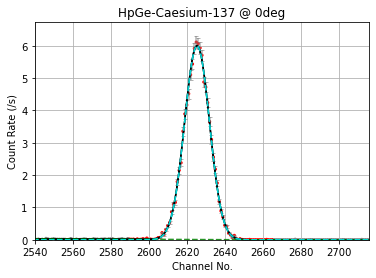

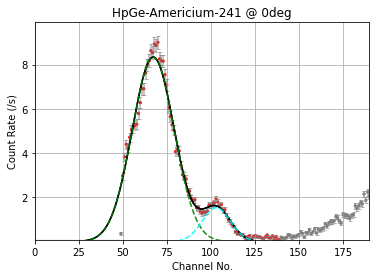

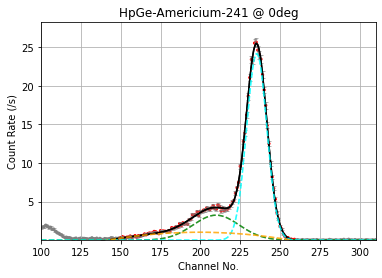

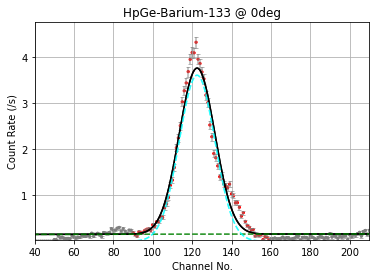

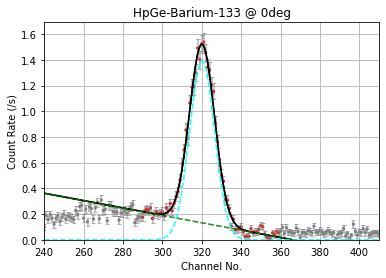

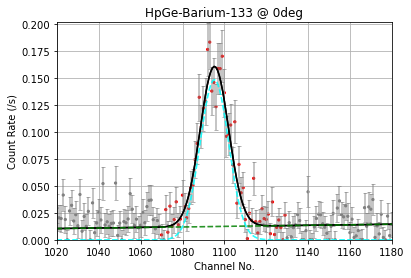

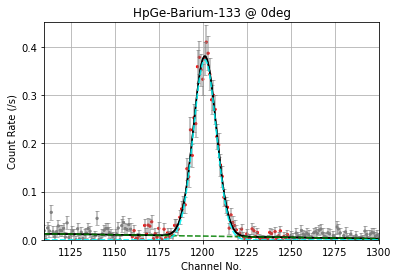

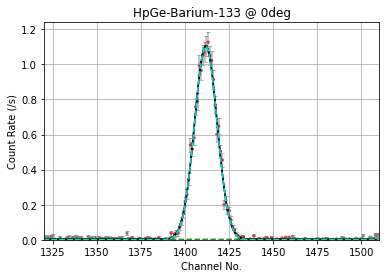

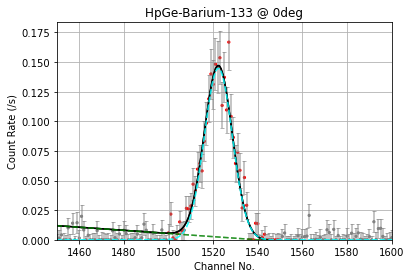

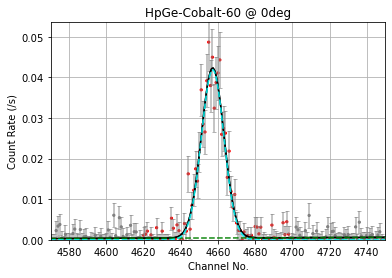

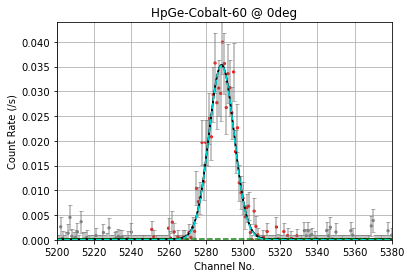

In [2]:
#Firstly reading ROIs and Spectra from file:
ROIS = fit.read_json('Data/ROIs.json')
SPECTRA_FILES = fit.read_json('Data/Spectra_files.json')

#Each spectra's ROIs are fitted for spectral peaks and displayed below:
HPGE_PARAMS = fit.fitting_on_axis_peaks(SPECTRA_FILES, 'HpGe', ROIS)

The produce_calibration_plot function takes the detector name string and produces a calibration curve and returns the best fit parameters, which are displayed below.

Calibration slope: 0.25146±0.00002
Calibration intercept :0.91±0.02


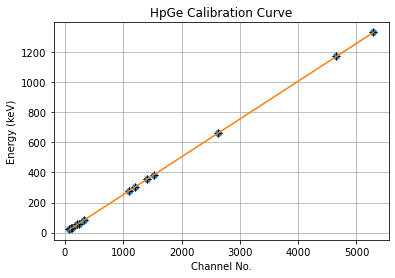

In [3]:
import Calibration_Curves as cal

CAL_PARAMS = cal.produce_calibration_plot('HpGe')
print('Calibration slope: %.5f' % CAL_PARAMS[0][0] + '±%.5f' % CAL_PARAMS[0][1])
print('Calibration intercept :%.2f' % CAL_PARAMS[1][0] + '±%.2f' % CAL_PARAMS[1][1])

The resolution_plot function produces a logarithmic plot of resolution percentage against energy, with the best fit line for the energy-resolution relation detailed in the report also displayed along with the fit parameters.

{'Fit Params': array([ 2.84797767e+06, -1.79218389e+03,  1.12246168e+00]),
 'Errors': array([4.75083060e+05, 2.00415790e+03, 1.55130282e+00])}

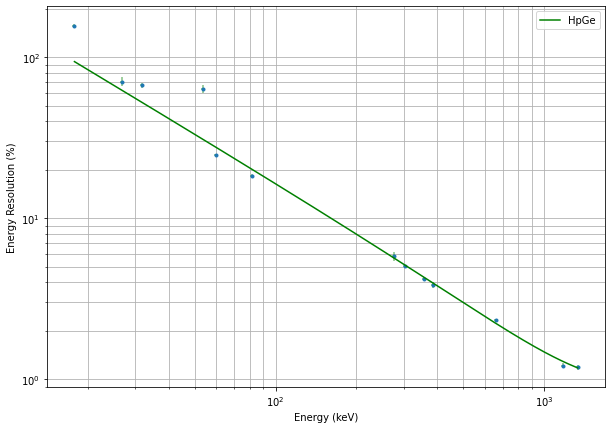

In [4]:
import Resolution_Plots as res

FIG, AX = plt.subplots(1, figsize=(10,7))
res.resolution_plot('HpGe', AX)

The absolute efficiencies are calculated as a function of energy through the function absolute_efficiency_plot, with the fit parameters also displayed.

{'Fit Params': array([ 0.02021918, -0.02183257, -0.06116088]),
 'Errors': array([3.80858786, 1.39672994, 0.12344417])}

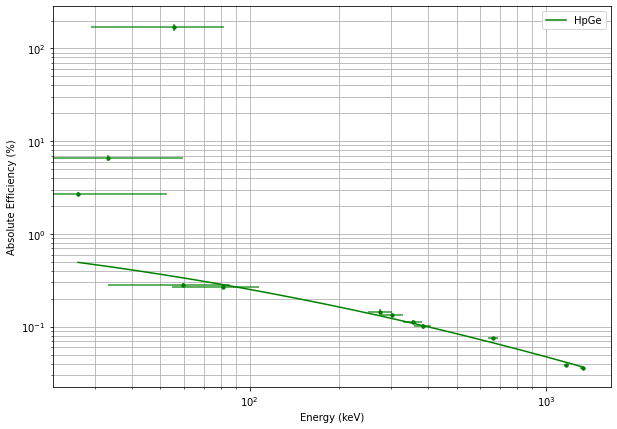

In [5]:
import Efficiencies as eff
FIG, AX = plt.subplots(1, figsize=(10,7))
eff.absolute_efficiency_plot('HpGe', AX)

The plots of both absolute and intrinsic efficiencies as functions of angle are produced via the off_axis_efficiency_comp_plot function. This performs the same fitting procedure as beofre, but for three selected peaks, in this case the 59keV Americium peak, the 661keV Caesium peak and the 1332keV Cobalt peak, and computes the efficiencies across the various source angles taken.

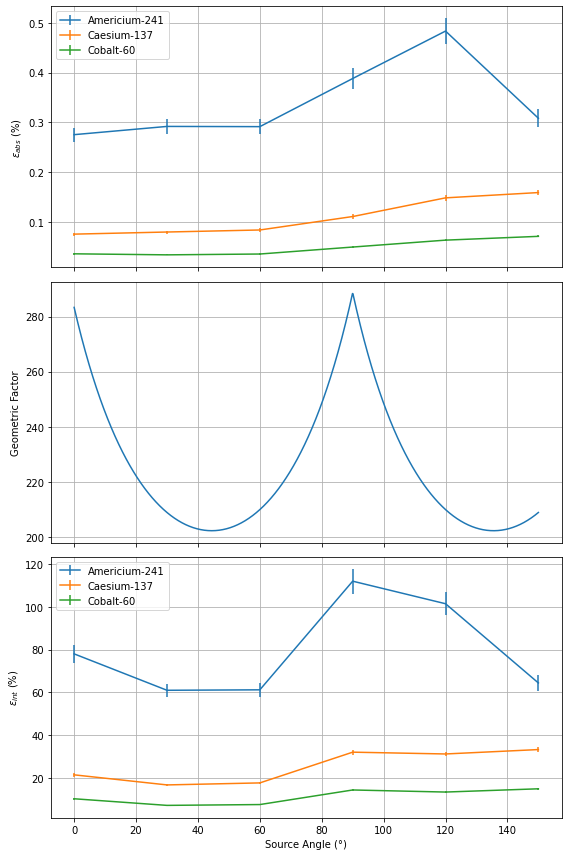

In [6]:
import Off_Axis as off

OFF_AXIS_PARAMS = off.off_axis_efficiency_comp_plot('HpGe')

Finally, the spectrum of the unknonwn element was plotted and its channels converted to actual energies using the acquired calibration parameters. The energies of the photopeaks were compared to known spectra and the energies appeared to fit the \textbt{IN$^{116m}$} spectrum, the emmission lines of which are plotted on the spectrum as vertical lines.

Text(0.5, 0, 'Energy (keV)')

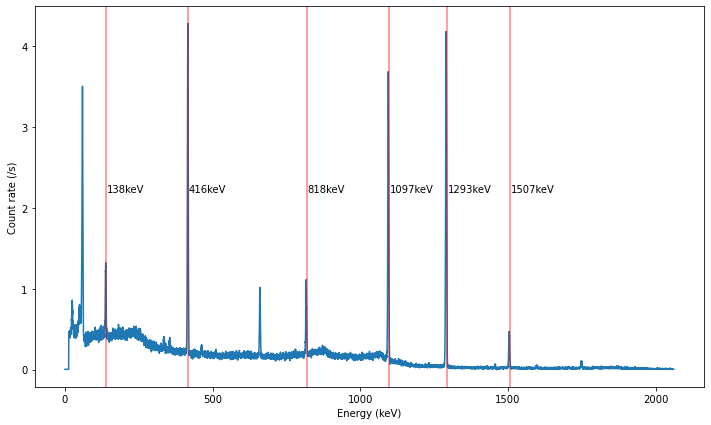

In [7]:
channels, count_rate, count_rate_errs, date = fit.extract_spectra_data('Data/HpGe/Unknown_Source.Spe')
bkd_count_rate, bkd_count_err = fit.background_count_rate('Data/HpGe/HpGe_gain1.51_background.Spe')

net_count_rate, net_count_rate_err = fit.subtract_background(count_rate, count_rate_errs, bkd_count_rate, bkd_count_err)


SLOPE, INTERCEPT =  CAL_PARAMS[0][0], CAL_PARAMS[1][0]
energies = fit.linear_func(channels, SLOPE, INTERCEPT)


FIG, AX = plt.subplots(1, figsize=(12,7))

Y = 2.2

AX.plot(energies, net_count_rate)
AX.axvline(x=138, color='r', linestyle='-', alpha=0.5)
AX.text(143, Y, '138keV')

AX.axvline(x=416, color='r', linestyle='-', alpha=0.5)
AX.text(420, Y, '416keV')

AX.axvline(x=818, color='r', linestyle='-', alpha=0.5)
AX.text(822, Y, '818keV')

AX.axvline(x=1097, color='r', linestyle='-', alpha=0.5)
AX.text(1101, Y, '1097keV')

AX.axvline(x=1293, color='r', linestyle='-', alpha=0.5)
AX.text(1297, Y, '1293keV')

AX.axvline(x=1507, color='r', linestyle='-', alpha=0.5)
AX.text(1511, Y, '1507keV')

AX.set_ylabel('Count rate (/s)')
AX.set_xlabel('Energy (keV)')
